# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

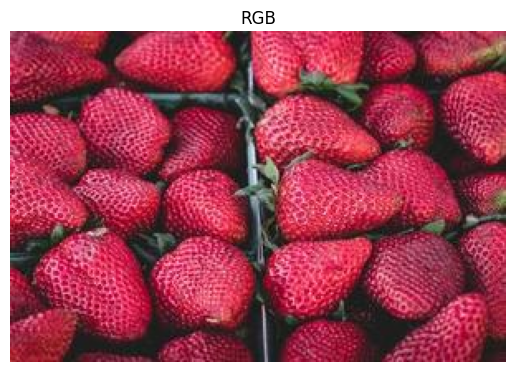

In [99]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
img_url="https://picsum.photos/300/200"
img_res=requests.get(img_url)
img_bytes=np.asarray(bytearray(img_res.content),dtype=np.uint8)
img_bgr=cv2.imdecode(img_bytes,cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis("off")
plt.show();

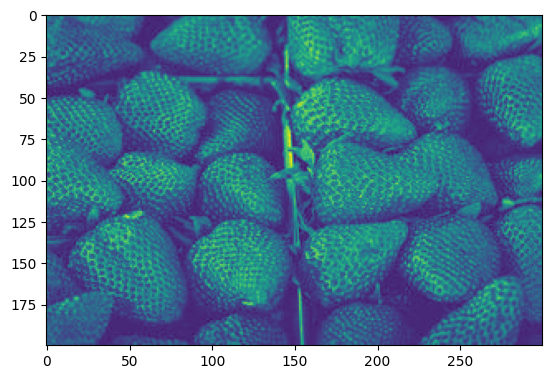

In [100]:
img_gray_np=np.dot(img_rgb[:,:,0:3],[0.299,0.587,0.114]).astype(np.uint8)
plt.imshow(img_gray_np)

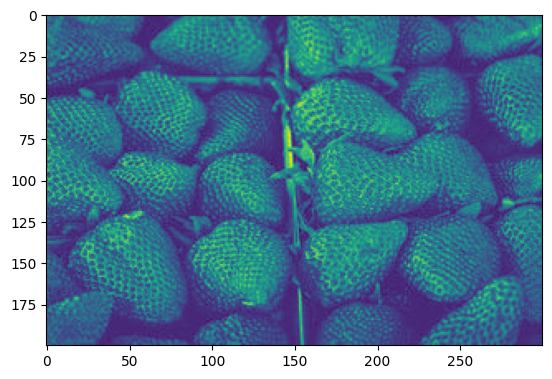

In [101]:
img_gray_cv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_cv)

In [102]:
print(img_rgb.shape)
print(img_gray_np.shape)
print(img_gray_cv.shape)

(200, 300, 3)
(200, 300)
(200, 300)


In [103]:
# Some pixel values
print(img_rgb[0,0])
print(img_gray_np[0,0])
print(img_gray_cv[0,0])

[156  73  99]
100
101


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [104]:
gray_float=img_gray_cv.astype(np.float32);
fft_raw=np.fft.fft2(gray_float)
fft_shift=np.fft.fftshift(fft_raw);

In [105]:
mag_spec=20*np.log(np.abs(fft_shift)+1)
phase_spec=np.angle(fft_shift)

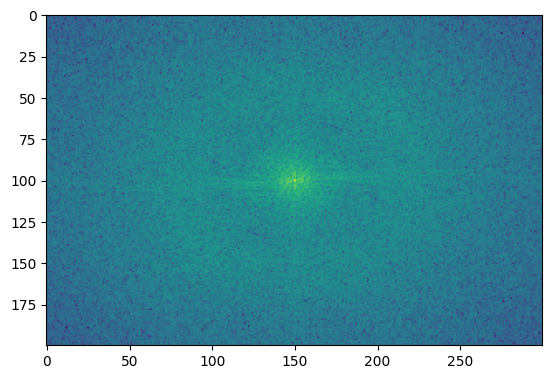

In [106]:
plt.imshow(mag_spec)

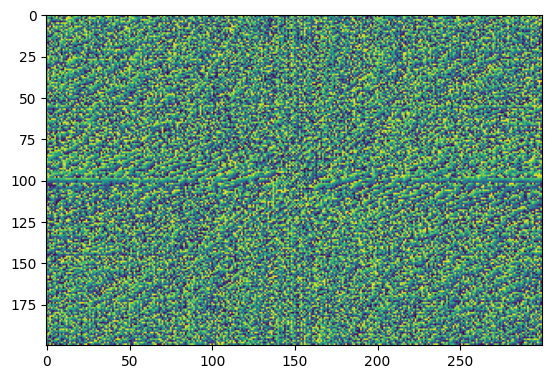

In [93]:
plt.imshow(phase_spec)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
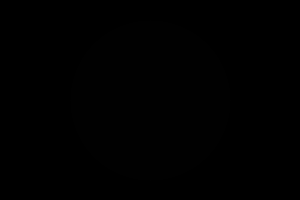

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
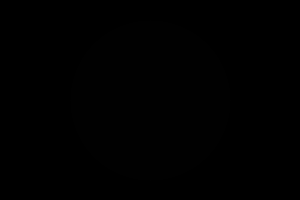

In [107]:
rows,cols=img_gray_cv.shape
c_row,c_col=rows//2,cols//2
# R=10
lpf_mask_10=np.zeros((rows,cols),np.uint8)
cv2.circle(lpf_mask_10,(c_col,c_row),10,1,-1)

#R=30
lpf_mask_30=np.zeros((rows,cols),np.uint8)
cv2.circle(lpf_mask_30,(c_col,c_row),30,1,-1)

#R=80
lpf_mask_80=np.zeros((rows,cols),np.uint8)
cv2.circle(lpf_mask_80,(c_col,c_row),80,1,-1)

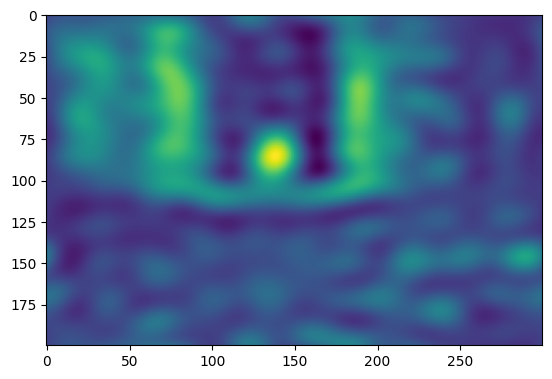

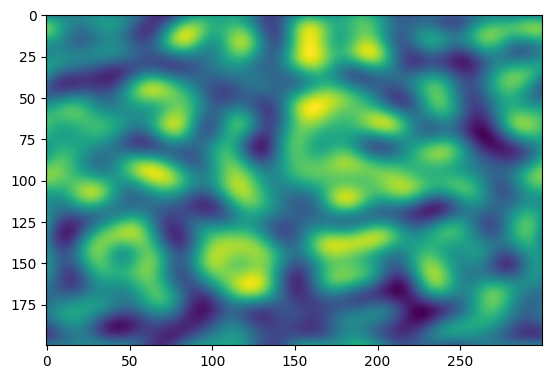

In [108]:
# Apply R=10
lpf_filt_fft=fft_shift*lpf_mask_10 # keep low freqs
lpf_ifft_shift=np.fft.ifftshift(lpf_filt_fft) # shift back to original
lpf_recon_10=np.fft.ifft2(lpf_ifft_shift) # get back img
lpf_recon_10=np.abs(lpf_recon_10) # keep only magnitude
plt.imshow(lpf_recon_10)

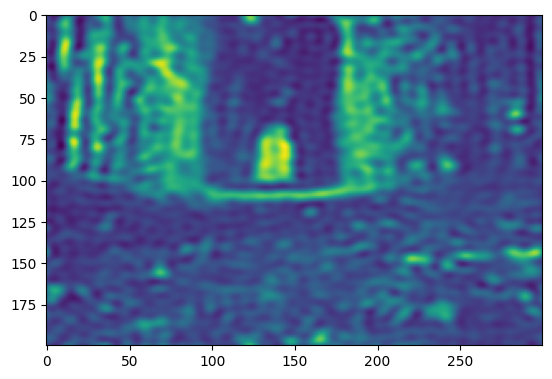

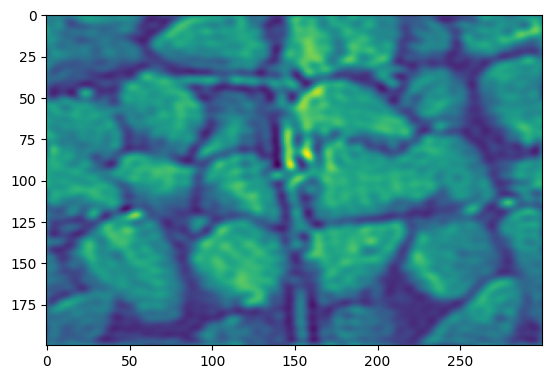

In [109]:
# Apply R=30
lpf_filt_fft=fft_shift*lpf_mask_30 # keep low freqs
lpf_ifft_shift=np.fft.ifftshift(lpf_filt_fft) # shift back to original
lpf_recon_30=np.fft.ifft2(lpf_ifft_shift) # get back img
lpf_recon_30=np.abs(lpf_recon_30) # keep only magnitude
plt.imshow(lpf_recon_30)

'\nAs filter_radius of circle increases,\nthe blur level decreases since lower frequencies are centered around the center\nof the image(since we performed fourier_transform shift), then increasing radii of low_pass_filter allows larger frequencies to pass, i.e. as distance from center increases, the frequencies also increase\nNow since higher frequencies correspond to more sharpness in the image, we obtain clearest image for R=80 case\n'

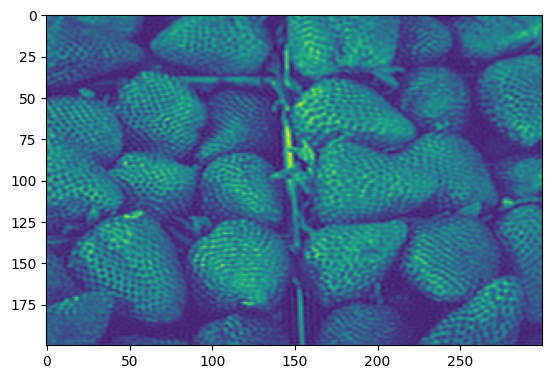

In [119]:
# Apply R=80
lpf_filt_fft=fft_shift*lpf_mask_80 # keep low freqs
lpf_ifft_shift=np.fft.ifftshift(lpf_filt_fft) # shift back to original
lpf_recon_80=np.fft.ifft2(lpf_ifft_shift) # get back img
lpf_recon_80=np.abs(lpf_recon_80) # keep only magnitude
plt.imshow(lpf_recon_80)

"""
As filter_radius of circle increases,
the blur level decreases since lower frequencies are centered around the center
of the image(since we performed fourier_transform shift), then increasing radii of low_pass_filter allows larger frequencies to pass, i.e. as distance from center increases, the frequencies also increase
Now since higher frequencies correspond to more sharpness in the image, we obtain clearest image for R=80 case
"""

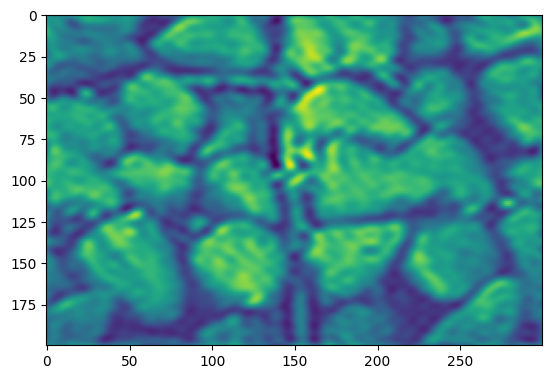

In [120]:
# Square filter
sq_lpf_mask=np.zeros((rows,cols),np.uint8)
mask_s=50
sq_lpf_mask[c_row-mask_s//2:c_row+mask_s//2,c_col-mask_s//2:c_col+mask_s//2]=1
sq_lpf_filt_fft=fft_shift*sq_lpf_mask # keep low freqs
sq_lpf_ifft_shift=np.fft.ifftshift(sq_lpf_filt_fft) # shift back to original
sq_lpf_recon=np.fft.ifft2(sq_lpf_ifft_shift) # get back img
sq_lpf_recon=np.abs(sq_lpf_recon) # keep only magnitude
plt.imshow(sq_lpf_recon)

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

'\nBy this method, we get e^j@ (which is complex) for a pixel. In contrast, np.angle() directly provides @ (which is a real value).\n'

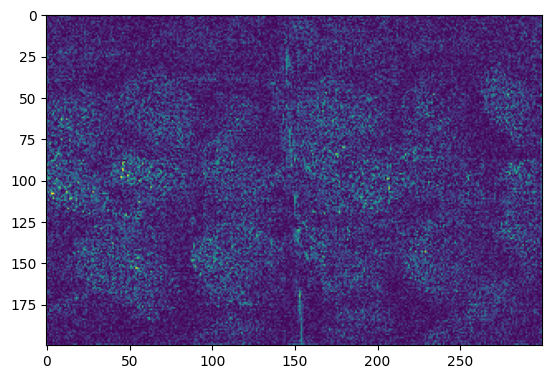

In [121]:
# Reconstruction by e^j@ only(phase)
phase_only_fft=fft_shift/np.abs(fft_shift)
phase_only_recon=np.fft.ifftshift(phase_only_fft) # shift back
phase_only_recon=np.fft.ifft2(phase_only_recon) # get the image back
phase_only_recon=np.abs(phase_only_recon) # take mag only

plt.imshow(phase_only_recon)
"""
By this method, we get e^j@ (which is complex) for a pixel. In contrast, np.angle() directly provides @ (which is a real value).
"""

'\nThe object is somewhat visible in reconstruction by phase_only_fft, but nothing is visible in angle_only_recon reconstruction.\n'

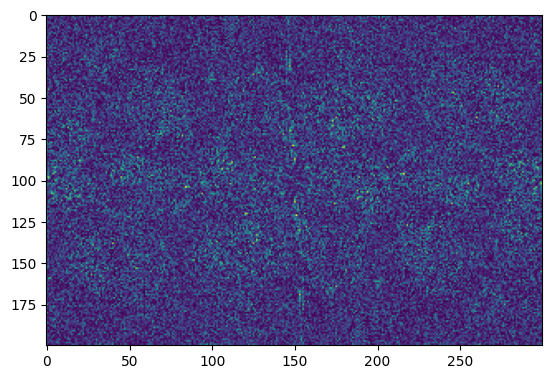

In [122]:
# Reconstruction by @(angle) only
angle_recon=np.angle(fft_shift) # get angle only
angle_recon_img=np.fft.ifftshift(angle_recon) # shift back freqs
angle_recon_img=np.fft.ifft2(angle_recon_img) # get img back
angle_recon_img=np.abs(angle_recon_img) # take mag

plt.imshow(angle_recon_img)

"""
The object is somewhat visible in reconstruction by phase_only_fft, but nothing is visible in angle_only_recon reconstruction.
"""

'\nSince nothing is clearly visible, I infer that the logarithm helped expand the view of\nthe magnitude spectrum, which otherwise would be very difficult to\nobserve properly (much like graphs of transfer functions, where logarithmic scales are used for better visibility).\n'

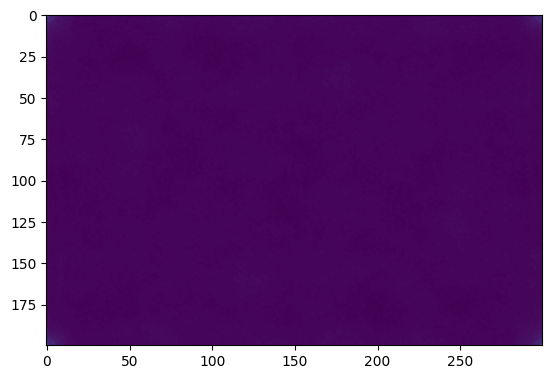

In [123]:
mag_only_fft=np.abs(fft_shift)
mag_only_recon=np.fft.ifftshift(mag_only_fft)
mag_only_recon=np.fft.ifft2(mag_only_recon)
mag_only_recon=np.abs(mag_only_recon)
plt.imshow(mag_only_recon)
"""
Since nothing is clearly visible, I infer that the logarithm helped expand the view of
the magnitude spectrum, which otherwise would be very difficult to
observe properly (much like graphs of transfer functions, where logarithmic scales are used for better visibility).
"""

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

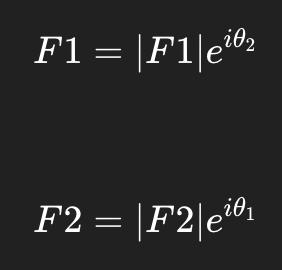

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


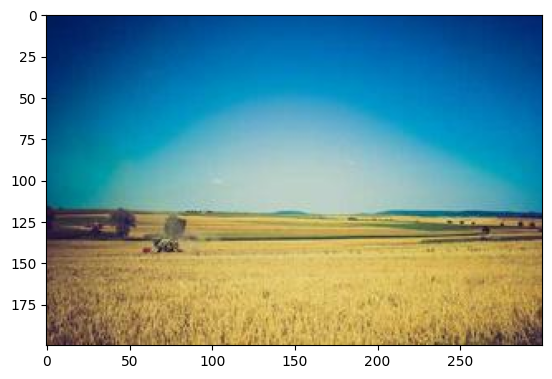

In [124]:
#get 2nd image
img_res2=requests.get(img_url)
img_bytes2=np.asarray(bytearray(img_res2.content),dtype=np.uint8)
img_bgr2=cv2.imdecode(img_bytes2,cv2.IMREAD_COLOR)
img_rgb2=cv2.cvtColor(img_bgr2,cv2.COLOR_BGR2RGB)
img_gray2=cv2.cvtColor(img_bgr2,cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb2)

In [125]:
# Do FFTs
fft1_shift=fft_shift
mag1=np.abs(fft1_shift)
phase1=fft1_shift/mag1

fft2_shift=np.fft.fftshift(np.fft.fft2(img_gray2))
mag2=np.abs(fft2_shift)
phase2=fft2_shift/mag2

# Swap
fft1_mod=mag1*phase2
fft2_mod=mag2*phase1

# Reconstruct
img_swap1=np.abs(np.fft.ifft2(np.fft.ifftshift(fft1_mod)))
img_swap2=np.abs(np.fft.ifft2(np.fft.ifftshift(fft2_mod)))

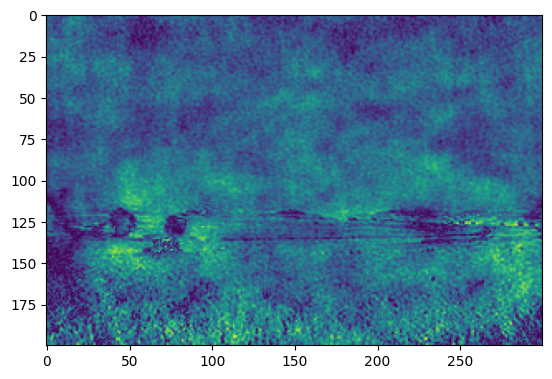

In [126]:
plt.imshow(img_swap1)

The reconstruction of the first image's geometry within the second verifies that the phase spectrum contains the critical spatial information.


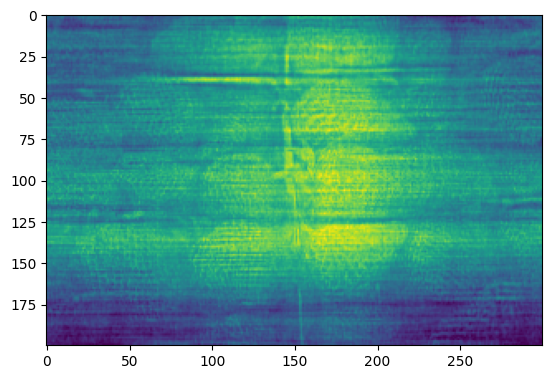

In [130]:
plt.imshow(img_swap2)
print("The reconstruction of the first image's geometry within the second verifies that the phase spectrum contains the critical spatial information.")